## Intro - Informationssökning, tabeller och diagram

Varje år görs hälsoundersökningar i Finland och världen över. Resultaten från många av undersökningarna är Öppna Data, och vi är fria att använda och analysera dem.

Resultaten från många undersökningar i Finland hittas på **THLs** (Terveyden ja Hyvinvoinnin Laitos - Institutet för hälsa och välfärd) hemsida, och i den här övningen ska vi lära oss hur man kan dra nytta av den data som finns samlad där, och åskådliggöra den i diagram.

**Vi lär oss**
#### Del 1
- Söka datasets (denna gång bland THLs öppna data)
- Spara csv-filer och läsa in dem i python
- Vad är egentligen en csv-fil, och varför fungerar den här inte som den ska?
- Snygga till tabeller, så att det viktiga kommer fram

#### Del 2
- Rita diagram utgående från tabell
- Snygga till diagram, så att det viktiga kommer fram

#### Del 3
- Ta in fler tabeller och jämför grafer

#### Del 4
- Gör själv

#### Uppgifter

> Uppgifter är markerade på det här sättet, och utspridda i dokumentet.

> Läs och följ instruktionerna noggrannt innan du går vidare i dokumentet.

>  Om uppgifterna innehåller frågor kan du skriva dina svar direkt i dokumentet. Om uppgifterna ber dig koda något kan du skapa en kodcell och testa.

## Del 1

### Söka datasets

För att kunna visa statistik måste vi först hitta data. I detta exempel har vi använt [THLs Öppna Databank](https://thl.fi/sv/web/thlfi-sv/statistik-och-data/material-och-tjanster/oppna-data). Där finns hundratals datasets att söka igenom.

Detta exempel använder datasets med information om ungdomars hälsovanor när det gäller användning av rusmedel. 
> Gå till databanken genom att klicka på länken. Klicka på länkar enligt bilderna nedan, så att du öppnar fliken "Hälsobeteende och psykiska symtom"

![](Data/THLmeny.PNG)

<img src=Data/THLmeny.PNG width=600>

### Ladda ned ett dataset

Nu ser du en meny med olika tillgängliga datasets. Ta hjälp av bilderna nedan när du gör uppgiften.

> Markera valfritt dataset (vi valde tobaksvanor i åk.8-9). Du kan välja fler, men hanteringen blir mer komplicerad då.

> Välj ett område för statistiken (Vi valde *Hela landet*)

>Välj årtal för statistiken (Vi markerade alla årtal), och tryck på *Visa*.

Du får nu se en tabell över det dataset du valt. Alla årtal och orter är kanske inte tillgängliga, och webbsidan meddelar om något saknas.

Du har nu möjlighet att "spara som CSV-fil" för att ladda ned filen och använda den på din dator. Vi har dock redan sparat filen så att den finns i mappen Data i samma mapp som denna Notebook. 

<img src=Data/THLval.PNG width=600>

<img src=Data/THLresult.PNG width=600>

### Dags att börja koda - Läs in csv-fil i python

Vi börjar med att hämta in funktionspaket med hjälp av ``import``-kommandot.

**pandas** låter oss läsa in datafiler i programmet, och **matplotlib-pyplot** låter oss rita diagram senare.
Kör kodcellen nedan så att funktionspaketen finns tillgängliga i dokumentet. (tryck på run-knappen, eller markera cellen och tryck *Ctrl+Enter*)

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

Nu är det dags att läsa in csv-filen som vi hittade. Detta görs med funktionen ``pd.read_csv()``. Vi behöver ange sökvägen till filen. Den finns i mappen Data och heter tobak_8_9.csv. Vi sparar den som en variabel, som vi kallar *hogstadiet*.

Vi använder sedan kommandot ``.head()``, som visar oss de första raderna av tabellen. På så sätt ser man om allt står rätt till.

> Kör kodcellen. Läs den noga, så att du förstår vad den gör och hur den är skriven. I programmering är det noga att varenda tecken blir rätt.

In [119]:
hogstadiet = pd.read_csv('Data/tobak_8_9.csv')
hogstadiet.head()

,"Röker dagligen, % av eleverna i årskurs 8 och 9;""288"";""Hela landet"";""358"";""totalt"";2000;24.5;"
0,"Röker dagligen, % av eleverna i årskurs 8 och ..."
1,"Röker dagligen, % av eleverna i årskurs 8 och ..."
2,"Röker dagligen, % av eleverna i årskurs 8 och ..."
3,"Röker dagligen, % av eleverna i årskurs 8 och ..."
4,"Röker dagligen, % av eleverna i årskurs 8 och ..."


Det här var konstigt. Tabellen ser inte alls bra ut. För att förstå vad som gick fel behöver vi tänka på vad en CSV-fil är.

### Vad är egentligen en csv-fil, och varför fungerar den här inte som den ska?

CSV står för *comma separated values*, och en sådan fil består av tabellvärden åtskilda med kommatecken. I bilden nedan ser vi ett exampel på en CSV-fil och den tabell som den ger. Vi märker att
- Första raden innehåller kolumnernas namn
- Alla element skiljs åt med kommatecken
- Varje rad har lika många element

Om något av dessa egenskaper saknas, måste vi lösa det på något annat sätt.



<img src='Data/CSVex.PNG' width=600>


Om vi öppnar filen *tobak_8_9.csv* och läser den (se bilden nedan) märker vi två problem:
- Det finns ingen rad med kolumnnamn. Den första raden innehåller data.
- Elementen separeras inte med kommatecken, utan med semikolon. Det här är vanligt när vi hanterar finländska datasets, eftersom vi använder decimalkomma. Systemet är gjort för engelska dokument som använder decimalpunkt. Dock ser vi att filens decimaltal ändå använder punkter, så decimaltecknen är inte ett problem.


<img src='Data/CSVsemicol.PNG' width=600>

Vi måste läsa in filen på nytt. Den här gången berättar vi för programmet att använda ";" som separator, och att titlarna saknas.

> Kör koden och läs den noga.

In [120]:
hogstadiet = pd.read_csv('Data/tobak_8_9.csv', sep=';', header=None)
hogstadiet.head()

,0,1,2,3,4,5,6,7
0,"Röker dagligen, % av eleverna i årskurs 8 och 9",288,Hela landet,358,totalt,2000,24.5,NaN
1,"Röker dagligen, % av eleverna i årskurs 8 och 9",288,Hela landet,358,totalt,2001,22.4,NaN
2,"Röker dagligen, % av eleverna i årskurs 8 och 9",288,Hela landet,358,totalt,2002,22.2,NaN
3,"Röker dagligen, % av eleverna i årskurs 8 och 9",288,Hela landet,358,totalt,2003,19.5,NaN
4,"Röker dagligen, % av eleverna i årskurs 8 och 9",288,Hela landet,358,totalt,2004,18.6,NaN


Sådär. Nu är tabellen finare. Kolumnerna har inga namn, men är numrerade istället. När vi nu får en överblick över tabellen ser vi att där finns mycket överflödig information.

### Snygga till tabellen 

Tabellen innehåller för många kolumner. Den enda information vi vill ha är årtal (kolumn 5) och %rökare (kolumn 6). Vi kan ta bort de övriga med kommandot ``.drop()`` om vi anger de överflödiga kolumnerna.

In [121]:
hogstadiet=hogstadiet.drop(columns=[0, 1, 2, 3, 4, 7])
hogstadiet.head()

,5,6
0,2000,24.5
1,2001,22.4
2,2002,22.2
3,2003,19.5
4,2004,18.6


Nu har vi koncentrerat tabellen, men det finns en sak vi ännu borde ändra på. Kolumnerna behöver rubriker, så att vi minns vad siffrorna betyder. Det går att skriva nästan vilka namn som helst, men det är bra att undvika åäö och mellanslag.

Vi byter namn på kolumnerna med kommandot ``.columns=[]``.

In [122]:
hogstadiet.columns=['Ar','tobak_8_9']
hogstadiet.head()

,Ar,tobak_8_9
0,2000,24.5
1,2001,22.4
2,2002,22.2
3,2003,19.5
4,2004,18.6


## Del 2

### Använd tabellen för att rita diagram

Nu har vi en snygg och enkel tabell, och det gör det lätt att använda den. Nu ska vi testa det andra funktionspaketet som vi importerade i början, **matplotlib.pyplot** (plt). Matplotlib innehåller grafiska verktyg, och pyplot låter oss rita grafer och diagram.

Vi ska använda funktionen ``plt.plot()``, som används för att rita grafer. I parentesen ska vi skriva in listorna med x-värden och y-värden för grafen. Vi vill ha årtalen på x-axeln, och vi kan ange kolumnen med årtal som **tobak.Ar** eller **tobak['Ar']**. Vi anger y-värden på samma sätt.

> Kör cellen. Blir det en graf?

> Vilken information får du av grafen? Hur kunde grafen göras tydligare?

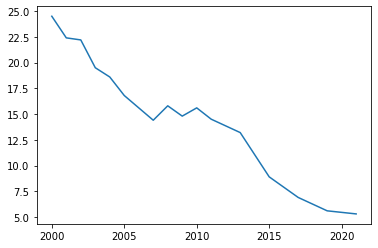

In [123]:
plt.plot(hogstadiet.Ar, hogstadiet.tobak_8_9)

Vi har en graf, och den visar att tobakskonsumtionen har gått ned med väldigt mycket på 20 år. Det här är dock ingen graf man skulle inkludera i en presentation. Vi behöver lära oss snygga till den.

Grafen har ett par problem:
- Den har ingen rubrik, inget som berättar vad den handlar om. Grafen borde kunna avläsas utan någon ytterligare beskrivning.
- y-skalan börjar inte från 0, och det gör grafen en aning missvisande.

### Snygga till diagram, så att det viktiga kommer fram

Vi ska lära oss ett par funktioner som hör ihop med grafritandet. I den förra kodcellen använde vi bara en enda rad med kod för att få fram en graf. Det finns många kommandon vi kan lägga till för att ändra på grafens utseende.


``fig=plt.figure(figsize=(15,5))`` ska skrivas först. Det låter oss välja grafens layout. I detta fall väljer vi bara storlek.

``plt.show()`` ska skrivas sist. Ser du den konstiga raden [<matplotlib.lines.Line2D at 0x25ac1c25070>] vid den förra grafen? Den får vi bort med detta kommando.

Mellan dessa kommandon kan vi fylla i:

``plt.title()`` för att få en rubrik

``plt.xlabel()``, ``plt.ylabel()`` för att få rubriker vid axlarna

``plt.xlim()``, ``plt.ylim()`` för att välja var axlarna börjar och slutar. 

``plt.grid()`` för att få ett rutnät

> Läs kodcellen noga och kör den. Lägg märke till vilken effekt varje kommando har.

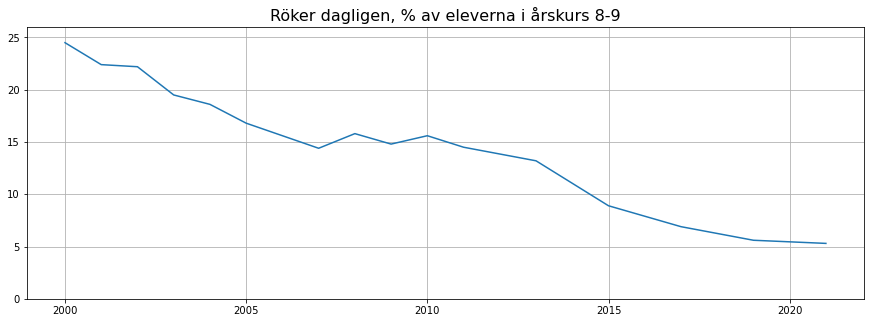

In [124]:
fig=plt.figure(figsize=(15,5))

plt.plot(hogstadiet.Ar, hogstadiet.tobak_8_9)
plt.title('Röker dagligen, % av eleverna i årskurs 8-9', fontsize=16)
plt.ylim(0,26)
plt.grid()

plt.show()

## Del 3

### Kombinera tabeller

Vi har gjort en simpel graf, men den skulle ge mer information om det fanns något att jämföra med. THL har också statistik för tobakskonsumtionen bland elever i årskurs 1-2 i gymnasiet. Datan hittas på samma ställe, och CSV-filen finns redan sparad i Data-mappen med namnet **tobak_1_2.csv**. Vi behandlar den på samma sätt som den tidigare filen.

In [125]:
gymnasiet = pd.read_csv('Data/tobak_1_2.csv', sep=';', header=None)
gymnasiet.head()

,0,1,2,3,4,5,6,7
0,"Röker dagligen, % av eleverna i årskurs 1 och ...",3921,Hela landet,358,totalt,2000,"19,5",NaN
1,"Röker dagligen, % av eleverna i årskurs 1 och ...",3921,Hela landet,358,totalt,2001,"17,3",NaN
2,"Röker dagligen, % av eleverna i årskurs 1 och ...",3921,Hela landet,358,totalt,2002,"19,6",NaN
3,"Röker dagligen, % av eleverna i årskurs 1 och ...",3921,Hela landet,358,totalt,2003,"16,7",NaN
4,"Röker dagligen, % av eleverna i årskurs 1 och ...",3921,Hela landet,358,totalt,2004,"15,7",NaN


Tabellen ser nästan likadan ut som den förra, men det finns en subtil skillnad. Decimaltalen använder kommatecken här. Det kommer förr eller senare att ställa till med problem, så vi måste ändra på kommandot som läser in den. Vi lägger till parametern  ``decimal=","``, så tolkas den rätt. Du kan se i nästa tabell att kommatecknen har blivit punkter.

In [126]:
gymnasiet = pd.read_csv('Data/tobak_1_2.csv', sep=';', decimal=",", header=None)
gymnasiet.head()

,0,1,2,3,4,5,6,7
0,"Röker dagligen, % av eleverna i årskurs 1 och ...",3921,Hela landet,358,totalt,2000,19.5,NaN
1,"Röker dagligen, % av eleverna i årskurs 1 och ...",3921,Hela landet,358,totalt,2001,17.3,NaN
2,"Röker dagligen, % av eleverna i årskurs 1 och ...",3921,Hela landet,358,totalt,2002,19.6,NaN
3,"Röker dagligen, % av eleverna i årskurs 1 och ...",3921,Hela landet,358,totalt,2003,16.7,NaN
4,"Röker dagligen, % av eleverna i årskurs 1 och ...",3921,Hela landet,358,totalt,2004,15.7,NaN


Nu kan vi använda likadana kommandon som tidigare för att ta bort de överflödiga kolumnerna och ge kolumnerna nya namn.

In [127]:
gymnasiet=gymnasiet.drop(columns=[0, 1, 2, 3, 4, 7])
gymnasiet.columns=['Ar','tobak_1_2']
gymnasiet.head()

,Ar,tobak_1_2
0,2000,19.5
1,2001,17.3
2,2002,19.6
3,2003,16.7
4,2004,15.7


Vi ska kombinera de båda tabellerna så att vi får all information på samma ställe. Båda tabellerna har en kolumn **Ar** som innehåller årtal. Vi kan slå ihop tabellerna med den gemensamma kolumnen Ar genom kommandot ``pd.merge( , , on='Ar')``. Vi namnger den nya, kombinerade tabellvariabeln *tobak*.

Obs! Högstadietabellen innehåller information från en undersökning 2021. Det året finns inte med i gymnasietabellen, och den informationen försvinner när vi gör så här.

In [128]:
tobak = pd.merge(hogstadiet, gymnasiet, on="Ar", how='outer') 
tobak.head()

,Ar,tobak_8_9,tobak_1_2
0,2000,24.5,19.5
1,2001,22.4,17.3
2,2002,22.2,19.6
3,2003,19.5,16.7
4,2004,18.6,15.7


### Jämförelsegraf

Vi vill ha en graf som inkluderar båda dessa datasets. Det är enkelt att rita fler grafer i samma diagram. Vi skriver bara flera ``plt.plot()``-kommandon. Vi måste ange både x- och y-lista i båda. 

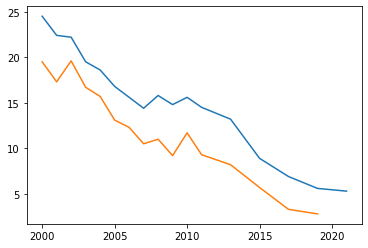

In [129]:
plt.plot(tobak.Ar, tobak.tobak_8_9)
plt.plot(tobak.Ar, tobak.tobak_1_2)

Den första grafskissen lyckades, och nu kan vi snygga till den. Vi använder samma kommandon som tidigare, men lägger till ett par nya funktioner.

``label=`` används i plot-kommandot för att åtskilja de båda graferna.

``plt.legend()`` ger en förklaringsruta som visar vad de olika graferna föreställer. Förklaringen tas från de *labels* som angetts.

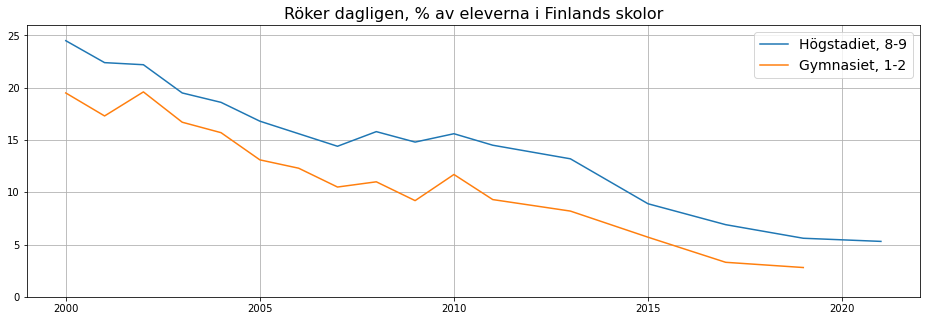

In [133]:
fig=plt.figure(figsize=(16,5))

plt.plot(tobak.Ar, tobak.tobak_8_9, label='Högstadiet, 8-9')
plt.plot(tobak.Ar, tobak.tobak_1_2, label= 'Gymnasiet, 1-2')

plt.title('Röker dagligen, % av eleverna i Finlands skolor', fontsize=16)
plt.ylim(0,26)
plt.xlim(1999,2022)
plt.grid()
plt.legend(fontsize=14)

plt.show()

Vi ser från grafen att rökning i både högstadiet och gymnasiet följer samma trender. Det är lite förvånande. Man kunde kanske tänka att trenderna i gymnasiets statistik borde ligga ett par år efter högstadiets. Detta tyder på att trenderna styrs av yttre faktorer. Man kunde kanske hitta direkta samband om man undersöker utvecklingen av tobakspriser eller tobakens status inom populärkulturen.

### Gör själv

Du kan fortsätta på samma tabell och graf. I mappen finns också THLs statistik om tobaksvanor hos elever i yrkesskolor (Data/tobak_ys.csv).

> Här nedan kan du läsa in den filen, snygga till den och lägga till den i tabellen och grafen.

Om du tror att du kan hantera en svårare uppgift kan du istället söka upp egna dataset från THL eller en annan relevant hemsida, och försöka sammanställa eller visualisera dem. 

In [131]:
yrkes = pd.read_csv('Data/tobak_ys.csv', sep=';', decimal=',', header=None)
yrkes=yrkes.drop(columns=[0, 1, 2, 3, 4, 7])
yrkes.columns=['Ar','tobak_ys']
yrkes.head()

,Ar,tobak_ys
0,2008,40.4
1,2009,38.2
2,2010,40.2
3,2011,38.7
4,2013,35.9


In [132]:
# Vi skapar en ny variabel tobak, som skriver över den förra, genom att kombinera den gamla tabellen tobak och den nya tabellen över yrkesskolor.
tobak = pd.merge(tobak, yrkes, on="Ar", how='outer') 
tobakk.head()

,Ar,tobak_8_9,tobak_1_2,tobak_ys
0,2000,24.5,19.5,NaN
1,2001,22.4,17.3,NaN
2,2002,22.2,19.6,NaN
3,2003,19.5,16.7,NaN
4,2004,18.6,15.7,NaN


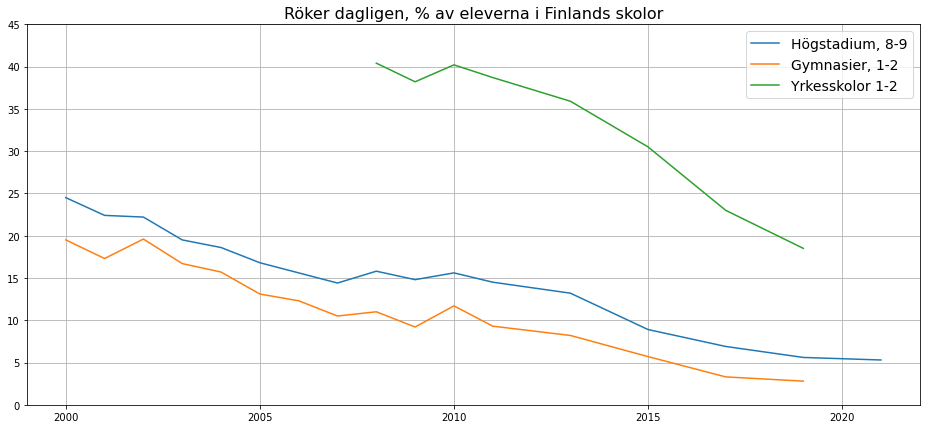

In [136]:
fig=plt.figure(figsize=(16,7))

plt.plot(tobakk.Ar, tobakk.tobak_8_9, label='Högstadium, 8-9')
plt.plot(tobakk.Ar, tobakk.tobak_1_2, label= 'Gymnasier, 1-2')
plt.plot(tobakk.Ar, tobakk.tobak_ys, label= 'Yrkesskolor 1-2')

plt.title('Röker dagligen, % av eleverna i Finlands skolor', fontsize=16)
plt.ylim(0,45)
plt.xlim(1999,2022)
plt.grid()
plt.legend(fontsize=14)

plt.show()